In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('data/book-encoded.csv')

columns = ['FTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A']

data = raw_data[columns]
data.head()

,FTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,1,24,5,14,4,11,8,7,5,0,0,0,0,1.20,6.5,15.00
1,1,14,8,8,2,13,12,4,3,1,2,0,0,1.83,3.5,4.50
2,-1,10,15,5,11,11,9,3,5,2,2,0,0,2.00,3.3,4.00
3,1,11,12,6,6,10,9,5,6,3,0,0,0,2.60,3.2,2.80
4,1,14,8,10,5,11,12,7,9,1,2,0,0,3.20,3.4,2.25


In [3]:
X = data.drop("FTR", 1)
y = data["FTR"]

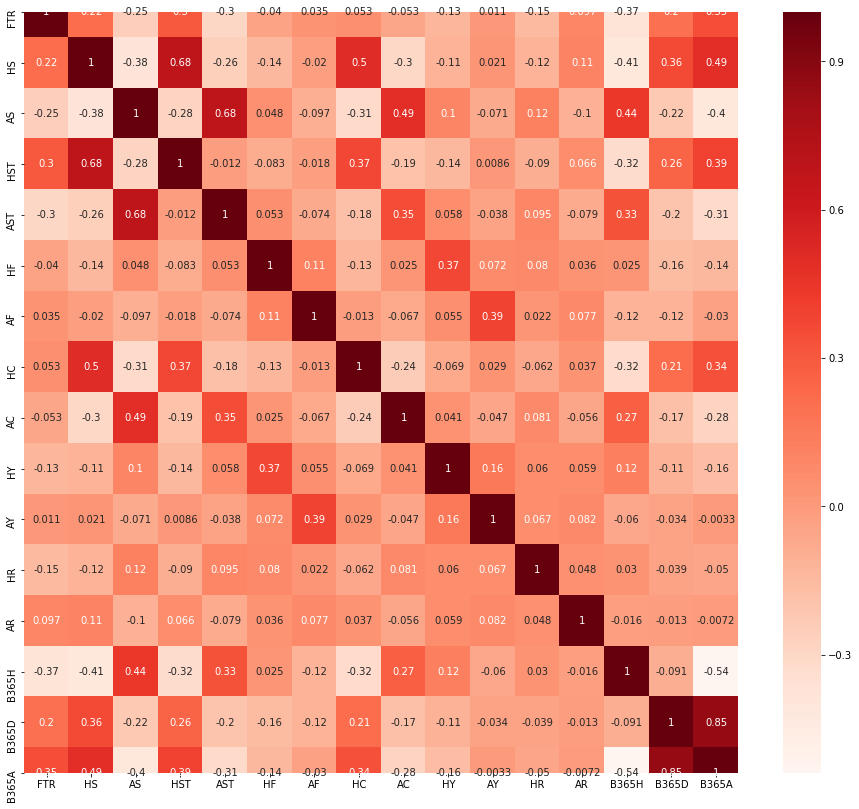

In [4]:
#Using Pearson Correlation
plt.figure(figsize=(16,14))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [5]:
#Correlation with output variable
cor_target = abs(cor["FTR"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

FTR      1.000000
HS       0.216613
AS       0.252079
HST      0.299110
AST      0.298349
B365H    0.372063
B365D    0.203769
B365A    0.349273
Name: FTR, dtype: float64

In [6]:
features=relevant_features.keys()[1:]

In [7]:
X = X[features]
X.head()

,HS,AS,HST,AST,B365H,B365D,B365A
0,24,5,14,4,1.20,6.5,15.00
1,14,8,8,2,1.83,3.5,4.50
2,10,15,5,11,2.00,3.3,4.00
3,11,12,6,6,2.60,3.2,2.80
4,14,8,10,5,3.20,3.4,2.25


In [8]:
y[:10]

0    1
1    1
2   -1
3    1
4    1
5   -1
6    1
7    1
8    1
9    0
Name: FTR, dtype: int64

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [10]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(7, input_dim=7, init='normal', activation='relu'))
    model.add(Dense(3, init='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [11]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [12]:
# evaluate baseline model with standardized dataset
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=10, batch_size=50)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, input_dim=7, activation="relu", kernel_initializer="normal")`
  """
/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="normal")`
  


Epoch 1/10
3320/3320 [==============================] - 0s 116us/step - loss: 1.0914 - accuracy: 0.4946
Epoch 2/10
3320/3320 [==============================] - 0s 52us/step - loss: 1.0651 - accuracy: 0.5398
Epoch 3/10
3320/3320 [==============================] - 0s 44us/step - loss: 1.0278 - accuracy: 0.5413
Epoch 4/10
3320/3320 [==============================] - 0s 47us/step - loss: 0.9951 - accuracy: 0.5464
Epoch 5/10
3320/3320 [==============================] - 0s 43us/step - loss: 0.9719 - accuracy: 0.5518
Epoch 6/10
3320/3320 [==============================] - 0s 44us/step - loss: 0.9572 - accuracy: 0.5581
Epoch 7/10
3320/3320 [==============================] - 0s 40us/step - loss: 0.9475 - accuracy: 0.5575
Epoch 8/10
3320/3320 [==============================] - 0s 43us/step - loss: 0.9404 - accuracy: 0.5639
Epoch 9/10
3320/3320 [==============================] - 0s 42us/step - loss: 0.9349 - accuracy: 0.5675
Epoch 10/10
370/370 [==============================] - 0s 99us/step


/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, input_dim=7, activation="relu", kernel_initializer="normal")`
  """
/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="normal")`
  


Epoch 1/10
3321/3321 [==============================] - 0s 84us/step - loss: 1.0878 - accuracy: 0.5026
Epoch 2/10
3321/3321 [==============================] - 0s 56us/step - loss: 1.0445 - accuracy: 0.5309
Epoch 3/10
3321/3321 [==============================] - 0s 49us/step - loss: 0.9931 - accuracy: 0.5468
Epoch 4/10
3321/3321 [==============================] - 0s 44us/step - loss: 0.9661 - accuracy: 0.5453
Epoch 5/10
3321/3321 [==============================] - 0s 47us/step - loss: 0.9533 - accuracy: 0.5468
Epoch 6/10
3321/3321 [==============================] - 0s 43us/step - loss: 0.9460 - accuracy: 0.5513
Epoch 7/10
3321/3321 [==============================] - 0s 44us/step - loss: 0.9400 - accuracy: 0.5559
Epoch 8/10
3321/3321 [==============================] - 0s 38us/step - loss: 0.9350 - accuracy: 0.5592
Epoch 9/10
3321/3321 [==============================] - 0s 44us/step - loss: 0.9307 - accuracy: 0.5625
Epoch 10/10
369/369 [==============================] - 0s 110us/step


/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, input_dim=7, activation="relu", kernel_initializer="normal")`
  """
/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="normal")`
  


Epoch 1/10
3321/3321 [==============================] - 0s 86us/step - loss: 1.0885 - accuracy: 0.4577
Epoch 2/10
3321/3321 [==============================] - 0s 41us/step - loss: 1.0451 - accuracy: 0.4866
Epoch 3/10
3321/3321 [==============================] - 0s 41us/step - loss: 0.9938 - accuracy: 0.5453
Epoch 4/10
3321/3321 [==============================] - 0s 41us/step - loss: 0.9678 - accuracy: 0.5516
Epoch 5/10
3321/3321 [==============================] - 0s 41us/step - loss: 0.9538 - accuracy: 0.5537
Epoch 6/10
3321/3321 [==============================] - 0s 39us/step - loss: 0.9445 - accuracy: 0.5565
Epoch 7/10
3321/3321 [==============================] - 0s 45us/step - loss: 0.9379 - accuracy: 0.5586
Epoch 8/10
3321/3321 [==============================] - 0s 58us/step - loss: 0.9325 - accuracy: 0.5619
Epoch 9/10
3321/3321 [==============================] - 0s 52us/step - loss: 0.9284 - accuracy: 0.5640
Epoch 10/10
369/369 [==============================] - 0s 101us/step


/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, input_dim=7, activation="relu", kernel_initializer="normal")`
  """
/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="normal")`
  


Epoch 1/10
3321/3321 [==============================] - 0s 81us/step - loss: 1.0890 - accuracy: 0.5098
Epoch 2/10
3321/3321 [==============================] - 0s 41us/step - loss: 1.0470 - accuracy: 0.5489
Epoch 3/10
3321/3321 [==============================] - 0s 40us/step - loss: 0.9927 - accuracy: 0.5504
Epoch 4/10
3321/3321 [==============================] - 0s 42us/step - loss: 0.9649 - accuracy: 0.5498
Epoch 5/10
3321/3321 [==============================] - 0s 39us/step - loss: 0.9534 - accuracy: 0.5516
Epoch 6/10
3321/3321 [==============================] - 0s 51us/step - loss: 0.9466 - accuracy: 0.5556
Epoch 7/10
3321/3321 [==============================] - 0s 47us/step - loss: 0.9414 - accuracy: 0.5577
Epoch 8/10
3321/3321 [==============================] - 0s 47us/step - loss: 0.9369 - accuracy: 0.5616
Epoch 9/10
3321/3321 [==============================] - 0s 44us/step - loss: 0.9330 - accuracy: 0.5634
Epoch 10/10
369/369 [==============================] - 0s 102us/step


/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, input_dim=7, activation="relu", kernel_initializer="normal")`
  """
/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="normal")`
  


Epoch 1/10
3321/3321 [==============================] - 0s 112us/step - loss: 1.0887 - accuracy: 0.4562
Epoch 2/10
3321/3321 [==============================] - 0s 39us/step - loss: 1.0419 - accuracy: 0.5155
Epoch 3/10
3321/3321 [==============================] - 0s 41us/step - loss: 0.9908 - accuracy: 0.5489
Epoch 4/10
3321/3321 [==============================] - 0s 39us/step - loss: 0.9678 - accuracy: 0.5474
Epoch 5/10
3321/3321 [==============================] - 0s 40us/step - loss: 0.9564 - accuracy: 0.5486
Epoch 6/10
3321/3321 [==============================] - 0s 43us/step - loss: 0.9492 - accuracy: 0.5510
Epoch 7/10
3321/3321 [==============================] - 0s 46us/step - loss: 0.9433 - accuracy: 0.5562
Epoch 8/10
3321/3321 [==============================] - 0s 44us/step - loss: 0.9381 - accuracy: 0.5589
Epoch 9/10
3321/3321 [==============================] - 0s 40us/step - loss: 0.9335 - accuracy: 0.5634
Epoch 10/10
369/369 [==============================] - 0s 101us/step


/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, input_dim=7, activation="relu", kernel_initializer="normal")`
  """
/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="normal")`
  


Epoch 1/10
3321/3321 [==============================] - 0s 87us/step - loss: 1.0877 - accuracy: 0.4604
Epoch 2/10
3321/3321 [==============================] - 0s 36us/step - loss: 1.0413 - accuracy: 0.5071
Epoch 3/10
3321/3321 [==============================] - 0s 40us/step - loss: 0.9889 - accuracy: 0.5631
Epoch 4/10
3321/3321 [==============================] - 0s 37us/step - loss: 0.9646 - accuracy: 0.5571
Epoch 5/10
3321/3321 [==============================] - 0s 44us/step - loss: 0.9509 - accuracy: 0.5534
Epoch 6/10
3321/3321 [==============================] - 0s 44us/step - loss: 0.9409 - accuracy: 0.5595
Epoch 7/10
3321/3321 [==============================] - 0s 36us/step - loss: 0.9330 - accuracy: 0.5625
Epoch 8/10
3321/3321 [==============================] - 0s 44us/step - loss: 0.9269 - accuracy: 0.5670
Epoch 9/10
3321/3321 [==============================] - 0s 41us/step - loss: 0.9219 - accuracy: 0.5694
Epoch 10/10
369/369 [==============================] - 0s 108us/step


/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, input_dim=7, activation="relu", kernel_initializer="normal")`
  """
/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="normal")`
  


Epoch 1/10
3321/3321 [==============================] - 0s 87us/step - loss: 1.0891 - accuracy: 0.5230
Epoch 2/10
3321/3321 [==============================] - 0s 53us/step - loss: 1.0471 - accuracy: 0.5453
Epoch 3/10
3321/3321 [==============================] - 0s 44us/step - loss: 0.9940 - accuracy: 0.5438
Epoch 4/10
3321/3321 [==============================] - 0s 42us/step - loss: 0.9673 - accuracy: 0.5465
Epoch 5/10
3321/3321 [==============================] - 0s 40us/step - loss: 0.9554 - accuracy: 0.5507
Epoch 6/10
3321/3321 [==============================] - 0s 42us/step - loss: 0.9481 - accuracy: 0.5553
Epoch 7/10
3321/3321 [==============================] - 0s 44us/step - loss: 0.9426 - accuracy: 0.5580
Epoch 8/10
3321/3321 [==============================] - 0s 55us/step - loss: 0.9378 - accuracy: 0.5610
Epoch 9/10
3321/3321 [==============================] - 0s 42us/step - loss: 0.9332 - accuracy: 0.5655
Epoch 10/10
369/369 [==============================] - 0s 132us/step


/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, input_dim=7, activation="relu", kernel_initializer="normal")`
  """
/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="normal")`
  


Epoch 1/10
3321/3321 [==============================] - 0s 100us/step - loss: 1.0902 - accuracy: 0.4580
Epoch 2/10
3321/3321 [==============================] - 0s 43us/step - loss: 1.0567 - accuracy: 0.5113
Epoch 3/10
3321/3321 [==============================] - 0s 45us/step - loss: 1.0067 - accuracy: 0.5474
Epoch 4/10
3321/3321 [==============================] - 0s 47us/step - loss: 0.9735 - accuracy: 0.5444
Epoch 5/10
3321/3321 [==============================] - 0s 52us/step - loss: 0.9585 - accuracy: 0.5453
Epoch 6/10
3321/3321 [==============================] - 0s 55us/step - loss: 0.9505 - accuracy: 0.5510
Epoch 7/10
3321/3321 [==============================] - 0s 44us/step - loss: 0.9440 - accuracy: 0.5586
Epoch 8/10
3321/3321 [==============================] - 0s 44us/step - loss: 0.9390 - accuracy: 0.5580
Epoch 9/10
3321/3321 [==============================] - 0s 45us/step - loss: 0.9344 - accuracy: 0.5640
Epoch 10/10
369/369 [==============================] - 0s 104us/step


/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, input_dim=7, activation="relu", kernel_initializer="normal")`
  """
/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="normal")`
  


Epoch 1/10
3321/3321 [==============================] - 0s 96us/step - loss: 1.0905 - accuracy: 0.5056
Epoch 2/10
3321/3321 [==============================] - 0s 47us/step - loss: 1.0559 - accuracy: 0.5462
Epoch 3/10
3321/3321 [==============================] - 0s 43us/step - loss: 1.0017 - accuracy: 0.5459
Epoch 4/10
3321/3321 [==============================] - 0s 47us/step - loss: 0.9654 - accuracy: 0.5453
Epoch 5/10
3321/3321 [==============================] - 0s 45us/step - loss: 0.9508 - accuracy: 0.5471
Epoch 6/10
3321/3321 [==============================] - 0s 51us/step - loss: 0.9436 - accuracy: 0.5516
Epoch 7/10
3321/3321 [==============================] - 0s 44us/step - loss: 0.9383 - accuracy: 0.5550
Epoch 8/10
3321/3321 [==============================] - 0s 46us/step - loss: 0.9336 - accuracy: 0.5598
Epoch 9/10
3321/3321 [==============================] - 0s 45us/step - loss: 0.9298 - accuracy: 0.5625
Epoch 10/10
369/369 [==============================] - 0s 97us/step


/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(7, input_dim=7, activation="relu", kernel_initializer="normal")`
  """
/home/jmacek/ML/tf2.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="normal")`
  


Epoch 1/10
3322/3322 [==============================] - 0s 96us/step - loss: 1.0923 - accuracy: 0.4241
Epoch 2/10
3322/3322 [==============================] - 0s 48us/step - loss: 1.0574 - accuracy: 0.4898
Epoch 3/10
3322/3322 [==============================] - 0s 45us/step - loss: 1.0039 - accuracy: 0.5433
Epoch 4/10
3322/3322 [==============================] - 0s 52us/step - loss: 0.9700 - accuracy: 0.5485
Epoch 5/10
3322/3322 [==============================] - 0s 44us/step - loss: 0.9543 - accuracy: 0.5518
Epoch 6/10
3322/3322 [==============================] - 0s 41us/step - loss: 0.9455 - accuracy: 0.5536
Epoch 7/10
3322/3322 [==============================] - 0s 43us/step - loss: 0.9390 - accuracy: 0.5575
Epoch 8/10
3322/3322 [==============================] - 0s 40us/step - loss: 0.9339 - accuracy: 0.5590
Epoch 9/10
3322/3322 [==============================] - 0s 43us/step - loss: 0.9294 - accuracy: 0.5635
Epoch 10/10
368/368 [==============================] - 0s 110us/step
Stan